In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        self.weights = np.array([10] + [0.2] * (input_size - 1))  # Initialize weights
        self.weights = np.append(self.weights, -0.75)  # Append the last weight
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        z = np.dot(X, self.weights[:-1]) + self.weights[-1]  # Include bias term
        return self.sigmoid(z)

    def fit(self, X, y, epochs=100):
        for epoch in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights[:-1] += self.learning_rate * error * X[i]  # Update weights
                self.weights[-1] += self.learning_rate * error  # Update bias

if __name__ == "__main__":
    file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"
    df = pd.read_excel(file_path)

    X = df.drop(columns=['Final_Marks']).values
    y = df['Final_Marks'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    perceptron = Perceptron(input_size=X.shape[1])
    perceptron.fit(X_train, y_train, epochs=100)

    y_pred = [round(perceptron.predict(x)) for x in X_test]

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

Accuracy: 0.0211864406779661


In [4]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.8/385.2 MB 5.6 MB/s eta 0:01:09
   ---------------------------------------- 1.8/385.2 MB 5.3 MB/s eta 0:01:13
   ---------------------------------------- 3.4/385.2 MB 6.1 MB/s eta 0:01:03
   ---------------------------------------- 4.7/385.2 MB 6.2 MB/s eta 0:01:02
    --------------------------------------- 5.2/385.2 MB 6.2 MB/s eta 0:01:01
    --------------------------------------- 5.2/385.2 MB 6.2 MB/s eta 0:01:01
    ---------------------------------

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class Perceptron:
    def __init__(self, input_size, learning_rate=0.05):
        self.weights = np.array([10] + [0.2] * (input_size - 1))  # Initialize weights
        self.weights = np.append(self.weights, -0.75)  # Append the last weight
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        z = np.dot(X, self.weights[:-1]) + self.weights[-1]  # Include bias term
        return self.sigmoid(z)

    def fit(self, X, y, epochs=100):
        for epoch in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights[:-1] += self.learning_rate * error * X[i]  # Update weights
                self.weights[-1] += self.learning_rate * error  # Update bias

def load_excel_file(file_path):
    try:
        # Try to load using pandas read_excel
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

if __name__ == "__main__":
    # The correct file path for a local machine
    file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

    # Load the Excel file
    df = load_excel_file(file_path)

    if df is not None:
        # Ensure the data is loaded and columns are correct
        if 'Final_Marks' in df.columns:
            # Prepare the input and output
            X = df.drop(columns=['Final_Marks']).values
            y = df['Final_Marks'].values

            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Initialize the perceptron model
            perceptron = Perceptron(input_size=X.shape[1])

            # Train the model
            perceptron.fit(X_train, y_train, epochs=100)

            # Make predictions (round to 0 or 1 for classification)
            y_pred = [round(perceptron.predict(x)) for x in X_test]

            # Calculate accuracy and other metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            recall = recall_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Output the results
            print("Accuracy:", accuracy)
            print("Precision (macro average):", precision)
            print("Recall (macro average):", recall)
            print("F1 Score (macro average):", f1)
            print("Confusion Matrix:\n", conf_matrix)
        else:
            print("Error: 'Final_Marks' column not found in the Excel file.")
    else:
        print("Failed to load the Excel file.")


Accuracy: 0.0211864406779661
Precision (macro average): 0.9110169491525423
Recall (macro average): 0.09090909090909091
F1 Score (macro average): 0.003772161448509996
Confusion Matrix:
 [[ 0  2  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0  0]]


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def load_excel_file(file_path):
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

if __name__ == "__main__":
    # The correct file path for a local machine
    file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

    # Load the Excel file
    df = load_excel_file(file_path)

    if df is not None:
        # Ensure the data is loaded and columns are correct
        if 'Final_Marks' in df.columns:
            # Prepare the input and output
            X = df.drop(columns=['Final_Marks']).values
            y = df['Final_Marks'].values

            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Scale the data (MLPs usually perform better with scaled data)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Initialize the MLP model
            mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, learning_rate_init=0.01, random_state=42)

            # Train the model
            mlp.fit(X_train, y_train)

            # Make predictions
            y_pred = mlp.predict(X_test)

            # Calculate accuracy and other metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            recall = recall_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)  # Use 'macro' for multiclass
            conf_matrix = confusion_matrix(y_test, y_pred)

            # Output the results
            print("Accuracy:", accuracy)
            print("Precision (macro average):", precision)
            print("Recall (macro average):", recall)
            print("F1 Score (macro average):", f1)
            print("Confusion Matrix:\n", conf_matrix)
        else:
            print("Error: 'Final_Marks' column not found in the Excel file.")
    else:
        print("Failed to load the Excel file.")


Accuracy: 0.3050847457627119
Precision (macro average): 0.32652222152222155
Recall (macro average): 0.24123117929390342
F1 Score (macro average): 0.23297316716575098
Confusion Matrix:
 [[ 0  1  0  0  0  0  0  0  0  1  0]
 [ 0  0  1  0  1  0  2  0  0  0  1]
 [ 0  0  3  2  1  2  1  0  1  0  0]
 [ 0  0  2 10  6  6  4  1  0  0  0]
 [ 0  0  0  4  9  8  9  2  0  2  1]
 [ 0  0  1  3  4 19  9  2  1  1  1]
 [ 0  0  0  2  1  8 10  8  3  2  4]
 [ 0  0  1  2  2  4 14 15  4  0  3]
 [ 0  0  0  1  0  3  2  6  1  2  0]
 [ 0  0  0  1  0  0  0  3  0  2  2]
 [ 0  0  0  0  2  0  3  0  0  0  3]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint

def load_excel_file(file_path):
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

if __name__ == "__main__":
    # The correct file path for a local machine
    file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

    # Load the Excel file
    df = load_excel_file(file_path)

    if df is not None:
        # Ensure the data is loaded and columns are correct
        if 'Final_Marks' in df.columns:
            # Prepare the input and output
            X = df.drop(columns=['Final_Marks']).values
            y = df['Final_Marks'].values

            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Scale the data (MLPs usually perform better with scaled data)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Parameter grid for MLPClassifier
            mlp_param_dist = {
                'mlp__hidden_layer_sizes': [(50, 30), (100,), (100, 50)],
                'mlp__activation': ['tanh', 'relu', 'logistic'],
                'mlp__solver': ['adam', 'sgd'],
                'mlp__learning_rate_init': uniform(0.001, 0.1),
                'mlp__max_iter': [200, 500],
                'mlp__alpha': uniform(0.0001, 0.1)  # L2 penalty (regularization term)
            }

            # Parameter grid for Perceptron
            perceptron_param_dist = {
                'perceptron__penalty': ['l2', 'l1', 'none'],
                'perceptron__alpha': uniform(0.0001, 0.1),
                'perceptron__max_iter': [1000, 2000],
                'perceptron__tol': [1e-4, 1e-3],
                'perceptron__learning_rate': ['constant', 'optimal', 'invscaling']
            }

            # Setup the pipelines for MLPClassifier and Perceptron
            mlp_pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('mlp', MLPClassifier())
            ])

            perceptron_pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('perceptron', Perceptron())
            ])

            # Setup RandomizedSearchCV for MLP
            mlp_search = RandomizedSearchCV(
                mlp_pipeline, mlp_param_dist, n_iter=50,
                scoring='accuracy', cv=5, random_state=42, n_jobs=-1
            )

            # Setup RandomizedSearchCV for Perceptron
            perceptron_search = RandomizedSearchCV(
                perceptron_pipeline, perceptron_param_dist, n_iter=50,
                scoring='accuracy', cv=5, random_state=42, n_jobs=-1
            )

            # Fit MLP with RandomizedSearchCV
            print("Tuning MLP Classifier...")
            mlp_search.fit(X_train, y_train)
            best_mlp = mlp_search.best_estimator_
            print("Best MLP Parameters:", mlp_search.best_params_)

            # Fit Perceptron with RandomizedSearchCV
            print("Tuning Perceptron...")
            perceptron_search.fit(X_train, y_train)
            best_perceptron = perceptron_search.best_estimator_
            print("Best Perceptron Parameters:", perceptron_search.best_params_)

            # Evaluate the best MLP model
            y_pred_mlp = best_mlp.predict(X_test)
            mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
            mlp_precision = precision_score(y_test, y_pred_mlp, average='macro', zero_division=1)
            mlp_recall = recall_score(y_test, y_pred_mlp, average='macro', zero_division=1)
            mlp_f1 = f1_score(y_test, y_pred_mlp, average='macro', zero_division=1)
            mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)

            # Output MLP results
            print("MLP Accuracy:", mlp_accuracy)
            print("MLP Precision (macro average):", mlp_precision)
            print("MLP Recall (macro average):", mlp_recall)
            print("MLP F1 Score (macro average):", mlp_f1)
            print("MLP Confusion Matrix:\n", mlp_conf_matrix)

            # Evaluate the best Perceptron model
            y_pred_perceptron = best_perceptron.predict(X_test)
            perceptron_accuracy = accuracy_score(y_test, y_pred_perceptron)
            perceptron_precision = precision_score(y_test, y_pred_perceptron, average='macro', zero_division=1)
            perceptron_recall = recall_score(y_test, y_pred_perceptron, average='macro', zero_division=1)
            perceptron_f1 = f1_score(y_test, y_pred_perceptron, average='macro', zero_division=1)
            perceptron_conf_matrix = confusion_matrix(y_test, y_pred_perceptron)

            # Output Perceptron results
            print("Perceptron Accuracy:", perceptron_accuracy)
            print("Perceptron Precision (macro average):", perceptron_precision)
            print("Perceptron Recall (macro average):", perceptron_recall)
            print("Perceptron F1 Score (macro average):", perceptron_f1)
            print("Perceptron Confusion Matrix:\n", perceptron_conf_matrix)
        else:
            print("Error: 'Final_Marks' column not found in the Excel file.")
    else:
        print("Failed to load the Excel file.")


Tuning MLP Classifier...


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

def load_excel_file(file_path):
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

def evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix

if __name__ == "__main__":
    # The correct file path for a local machine
    file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

    # Load the Excel file
    df = load_excel_file(file_path)

    if df is not None:
        # Ensure the data is loaded and columns are correct
        if 'Final_Marks' in df.columns:
            # Prepare the input and output
            X = df.drop(columns=['Final_Marks']).values
            y = df['Final_Marks'].values

            # Split the dataset into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Scale the data (important for many classifiers)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # List of classifiers to evaluate
            classifiers = {
                "SVM": SVC(),
                "Decision Tree": DecisionTreeClassifier(),
                "Random Forest": RandomForestClassifier(),
                "AdaBoost": AdaBoostClassifier(),
                "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
                "Naïve Bayes": GaussianNB(),
                "CatBoost": CatBoostClassifier(silent=True)  # silent=True suppresses warnings
            }

            results = []

            # Evaluate each classifier
            for name, clf in classifiers.items():
                accuracy, precision, recall, f1, conf_matrix = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
                results.append({
                    "Classifier": name,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1 Score": f1,
                    "Confusion Matrix": conf_matrix
                })

            # Convert results to a DataFrame for better visualization
            results_df = pd.DataFrame(results)

            # Print the results
            print(results_df)
        else:
            print("Error: 'Final_Marks' column not found in the Excel file.")
    else:
        print("Failed to load the Excel file.")


ModuleNotFoundError: No module named 'catboost'

In [7]:
pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 1.0/101.7 MB 5.6 MB/s eta 0:00:19
   - -------------------------------------- 3.4/101.7 MB 8.7 MB/s eta 0:00:12
   -- ------------------------------------- 5.8/101.7 MB 10.1 MB/s eta 0:00:10
   -- ------------------------------------- 7.3/101.7 MB 9.4 MB/s eta 0:00:11
   --- ------------------------------------ 8.4/101.7 MB 8.7 MB/s eta 0:00:11
   ---- ----------------------------------- 10.2/101.7 MB 8.5 MB/s eta 0:00:11
   ---- ----------------------------------- 12.1/101.7 MB 8.5 MB/s eta 0:00:11
   ----- ---------------------------------- 14.2/101.7 MB 8.7 MB/s eta 0:00:11
   ------ --------------------------------- 16.3/101.7 MB 8.8 MB/s eta 0:00:10
   ------- -------------------------------- 18.1/101.7 MB 8.9 MB/s eta 0:00:10
   -------- ------------------------------- 20.4/101.7 MB 9.1 MB/s eta 0:00:09
   -------- ------------------------------- 22.3/101.7 MB 9.1 MB

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def load_excel_file(file_path):
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return None

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, conf_matrix

# File path to your Excel file
file_path = r"C:\Users\91912\Desktop\5TH SEMESTER\ML\GST - C_AST.xlsx"

# Load Excel data
df = load_excel_file(file_path)

if df is not None and 'Final_Marks' in df.columns:
    X = df.drop(columns=['Final_Marks']).values
    y = df['Final_Marks'].values

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


In [3]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC()

# Fit the model
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_svm)

# Display Results
print("SVM Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


SVM Results:
Accuracy: 0.3177966101694915
Precision: 0.5905377409548282
Recall: 0.23054236056537858
F1 Score: 0.21344752241070014
Confusion Matrix:
[[ 0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  2  0  2  1  0  0  0]
 [ 0  0  0  0  6  0  3  1  0  0  0]
 [ 0  0  0  5 16  0  6  2  0  0  0]
 [ 0  0  0  4 15  5 10  1  0  0  0]
 [ 0  0  0  2  9 16 12  1  1  0  0]
 [ 0  0  0  1  6  0 15 13  0  0  3]
 [ 0  0  0  2  3  0 21 18  0  0  1]
 [ 0  0  0  0  0  0 11  4  0  0  0]
 [ 0  0  0  1  1  0  4  1  0  0  1]
 [ 0  0  0  0  1  0  1  0  0  0  6]]


In [4]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_dt)

# Display Results
print("Decision Tree Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Decision Tree Results:
Accuracy: 0.3516949152542373
Precision: 0.31053774830370573
Recall: 0.3080365586341417
F1 Score: 0.2971483329116669
Confusion Matrix:
[[ 0  0  0  0  0  0  0  2  0  0  0]
 [ 0  1  1  0  0  1  1  0  0  0  1]
 [ 0  0  4  3  1  1  0  0  1  0  0]
 [ 1  1  1  6  9  5  4  1  0  0  1]
 [ 0  1  0  4 13  6  5  0  1  3  2]
 [ 0  1  0  3  3 18  9  3  2  2  0]
 [ 0  3  0  0  3  6 16  3  2  3  2]
 [ 0  1  0  4  2  6  9 15  4  1  3]
 [ 0  0  0  0  1  2  4  2  4  2  0]
 [ 0  0  0  1  1  1  0  1  0  2  2]
 [ 0  0  0  0  2  1  0  0  0  1  4]]


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_rf)

# Display Results
print("Random Forest Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Random Forest Results:
Accuracy: 0.3093220338983051
Precision: 0.3567983461218134
Recall: 0.23540219058235082
F1 Score: 0.2304217521608826
Confusion Matrix:
[[ 0  1  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  4  0  1  0  0  0  0]
 [ 0  0  2  1  2  1  4  0  0  0  0]
 [ 0  0  1  4 11  6  5  1  1  0  0]
 [ 0  0  0  5 10  6  8  4  0  1  1]
 [ 0  0  0  1  5 18  9  5  1  1  1]
 [ 0  0  0  1  2  3 14 11  2  1  4]
 [ 0  0  0  1  3  3 13 18  5  1  1]
 [ 0  0  0  0  0  2  4  5  2  0  2]
 [ 0  0  0  0  1  2  1  1  0  1  2]
 [ 0  0  0  0  2  1  1  0  0  0  4]]


In [6]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada_model = AdaBoostClassifier()

# Fit the model
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_ada)

# Display Results
print("AdaBoost Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


C:\Users\91912\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Accuracy: 0.19915254237288135
Precision: 0.679073756432247
Recall: 0.11165496890785721
F1 Score: 0.06798763141620284
Confusion Matrix:
[[ 0  0  0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  4  1  0  0  0]
 [ 0  0  0  0  2  0  8  0  0  0  0]
 [ 0  0  1  0  2  0 25  1  0  0  0]
 [ 0  0  0  0  3  0 31  1  0  0  0]
 [ 0  0  0  0  0  8 33  0  0  0  0]
 [ 0  0  0  0  1  0 36  1  0  0  0]
 [ 0  0  0  0  2  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0]]


In [7]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_xgb)

# Display Results
print("XGBoost Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


C:\Users\91912\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:58:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 0.2966101694915254
Precision: 0.3224072267876043
Recall: 0.23160874668001402
F1 Score: 0.22367644153083724
Confusion Matrix:
[[ 0  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  2  1  1  0  1  0  0  0  0]
 [ 0  0  2  1  3  1  2  1  0  0  0]
 [ 0  0  4  6  8  6  4  0  1  0  0]
 [ 0  0  0  4 12  6  8  3  0  1  1]
 [ 0  0  0  1  6 18 12  1  3  0  0]
 [ 0  0  1  2  2  5 11  8  4  1  4]
 [ 0  0  0  3  2  6 13 14  5  1  1]
 [ 0  0  0  0  0  2  5  4  2  0  2]
 [ 0  0  0  0  0  2  1  1  1  1  2]
 [ 0  0  0  0  2  1  1  0  0  0  4]]


In [8]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
accuracy, precision, recall, f1, conf_matrix = evaluate_model(y_test, y_pred_nb)

# Display Results
print("Naïve Bayes Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Naïve Bayes Results:
Accuracy: 0.2669491525423729
Precision: 0.3055152932695591
Recall: 0.24900858723509334
F1 Score: 0.19427692618152098
Confusion Matrix:
[[ 0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  2  1  0  0  1  1  0  0  0]
 [ 0  2  1  5  0  0  0  0  1  0  1]
 [ 0  0  5 11  2  1  1  2  0  2  5]
 [ 0  0  3  7  5  6  1  3  1  4  5]
 [ 0  0  3  6  2 13  2  2  4  4  5]
 [ 0  0  3  9  2  2  2  9  4  4  3]
 [ 0  0  3  5  2  1  0 19  9  2  4]
 [ 0  0  1  0  0  1  0  4  3  4  2]
 [ 0  0  0  1  1  0  0  1  0  3  2]
 [ 0  0  1  0  1  0  0  0  0  0  6]]


      Classifier  Accuracy
0            SVM    0.3178
1  Decision Tree    0.3517
2  Random Forest    0.3093
3       AdaBoost    0.1991
4        XGBoost    0.2966
5    Naïve Bayes    0.2669


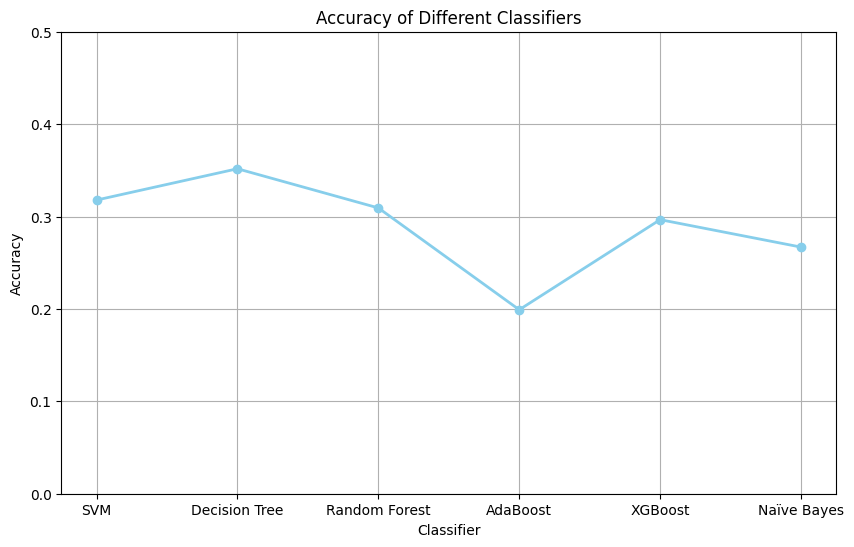

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the results
data = {
    "Classifier": ["SVM", "Decision Tree", "Random Forest", "AdaBoost", "XGBoost", "Naïve Bayes"],
    "Accuracy": [0.3178, 0.3517, 0.3093, 0.1991, 0.2966, 0.2669]
}

# Creating a DataFrame
results_df = pd.DataFrame(data)

# Displaying the accuracy table
print(results_df)

# Plotting the accuracy of all classifiers as a line plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['Classifier'], results_df['Accuracy'], marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 0.5)  # Set y-axis limit from 0 to 0.5
plt.grid(True)  # Adding grid for better readability
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_nb = nb_model.score(X_train, y_train)
test_acc_nb = nb_model.score(X_test, y_test)

# Display results
print("Naïve Bayes Results:")
print(f"Training Accuracy: {train_acc_nb:.4f}")
print(f"Test Accuracy: {test_acc_nb:.4f}")

Naïve Bayes Results:
Training Accuracy: 0.2915
Test Accuracy: 0.2669


In [15]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_xgb = xgb_model.score(X_train, y_train)
test_acc_xgb = xgb_model.score(X_test, y_test)

# Display results
print("XGBoost Results:")
print(f"Training Accuracy: {train_acc_xgb:.4f}")
print(f"Test Accuracy: {test_acc_xgb:.4f}")

C:\Users\91912\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Training Accuracy: 0.8436
Test Accuracy: 0.2966


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_ada = ada_model.score(X_train, y_train)
test_acc_ada = ada_model.score(X_test, y_test)

# Display results
print("AdaBoost Results:")
print(f"Training Accuracy: {train_acc_ada:.4f}")
print(f"Test Accuracy: {test_acc_ada:.4f}")

C:\Users\91912\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Training Accuracy: 0.2394
Test Accuracy: 0.1992


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_rf = rf_model.score(X_train, y_train)
test_acc_rf = rf_model.score(X_test, y_test)

# Display results
print("Random Forest Results:")
print(f"Training Accuracy: {train_acc_rf:.4f}")
print(f"Test Accuracy: {test_acc_rf:.4f}")

Random Forest Results:
Training Accuracy: 0.8436
Test Accuracy: 0.3178


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_dt = dt_model.score(X_train, y_train)
test_acc_dt = dt_model.score(X_test, y_test)

# Display results
print("Decision Tree Results:")
print(f"Training Accuracy: {train_acc_dt:.4f}")
print(f"Test Accuracy: {test_acc_dt:.4f}")

Decision Tree Results:
Training Accuracy: 0.8436
Test Accuracy: 0.3263


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming X and y are defined as your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Calculate training and test accuracy
train_acc_svm = svm_model.score(X_train, y_train)
test_acc_svm = svm_model.score(X_test, y_test)

# Display results
print("SVM Results:")
print(f"Training Accuracy: {train_acc_svm:.4f}")
print(f"Test Accuracy: {test_acc_svm:.4f}")

SVM Results:
Training Accuracy: 0.3223
Test Accuracy: 0.2246


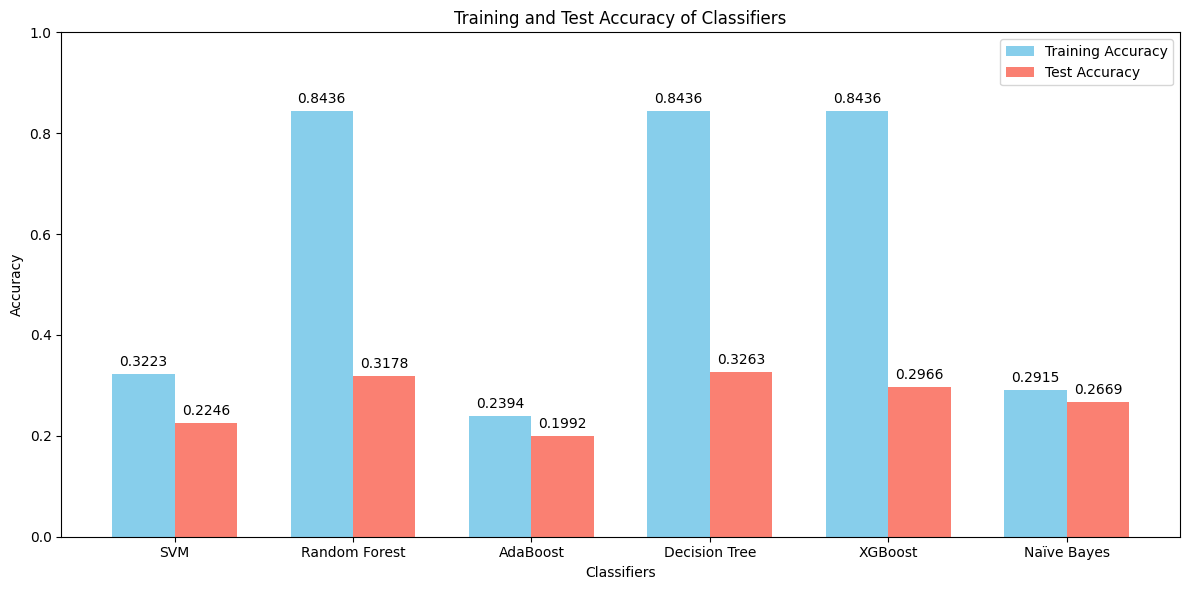

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Classifier names
classifiers = ["SVM", "Random Forest", "AdaBoost", "Decision Tree", "XGBoost", "Naïve Bayes"]

# Training and Test Accuracy values
train_accuracies = [0.3223, 0.8436, 0.2394, 0.8436, 0.8436, 0.2915]
test_accuracies = [0.2246, 0.3178, 0.1992, 0.3263, 0.2966, 0.2669]

# Set up the bar width and positions
bar_width = 0.35
x = np.arange(len(classifiers))

# Create the plot
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - bar_width/2, train_accuracies, bar_width, label='Training Accuracy', color='skyblue')
bars2 = plt.bar(x + bar_width/2, test_accuracies, bar_width, label='Test Accuracy', color='salmon')

# Adding titles and labels
plt.title('Training and Test Accuracy of Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(x, classifiers)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.legend()

# Adding data labels on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

# Data for the results
data = {
    "Classifier": ["SVM", "Decision Tree", "Random Forest", "AdaBoost", "XGBoost", "Naïve Bayes"],
    "Accuracy": [0.3178, 0.3517, 0.3093, 0.1991, 0.2966, 0.2669],
    "Precision": [0.5905, 0.3105, 0.3568, 0.6791, 0.3224, 0.3055],
    "Recall": [0.2305, 0.3080, 0.2354, 0.1117, 0.2316, 0.2490],
    "F1 Score": [0.2134, 0.2971, 0.2304, 0.0680, 0.2237, 0.1943]
}

# Creating a DataFrame
results_df = pd.DataFrame(data)

# Formatting the Accuracy to two decimal places
results_df['Accuracy'] = results_df['Accuracy'].apply(lambda x: f"{x:.2f}")

# Displaying the formatted DataFrame
print(results_df)

      Classifier Accuracy  Precision  Recall  F1 Score
0            SVM     0.32     0.5905  0.2305    0.2134
1  Decision Tree     0.35     0.3105  0.3080    0.2971
2  Random Forest     0.31     0.3568  0.2354    0.2304
3       AdaBoost     0.20     0.6791  0.1117    0.0680
4        XGBoost     0.30     0.3224  0.2316    0.2237
5    Naïve Bayes     0.27     0.3055  0.2490    0.1943
